## TIME SERIES & FORECASTING

Time series can be defined as a sequence or series of data points that are ordered in time. In traditional machine learning, a dataset is a collection of observations.

It makes predictions based on unseen data, and it predicts the future with all the previous observations taken into consideration. In a time series, the dataset is different. A time-series adds a definite order of dependence between observations.

In time series, any variable that changes as time goes on is acceptable. It is normal to use a time series to track progress over some time. This can be tracked over a short term or long term.

Time series are assumed to be generated at a spaced timing. **When the data in the time series are timed and regular, they are called regular time series, and when they are not regular or timed, they are called irregular time series.**

### Real-life Applications of Time Series

- A time series model can be used in predicting the closing price of the stock at the end of the day.
- It can be used in predicting the number of product sales.
- Time series models can forecast the birth or death rate at a hospital.
- It can be used to forecast the number of passengers a bus terminal will have.
- Used to forecast the unemployment rate of a city or state.

### Time Series Analysis

**Time series analysis can be seen as getting meaningful insight and characteristics to comprehend it (what ever you are analyzing) better.** Time series is beneficial when making predictions. It understands the scope and uses it for future forecasting. Time series analysis has also been used to understand the changes between the chosen data point and changes in other variables over the same period.

<img src = 'https://d2908q01vomqb2.cloudfront.net/f1f836cb4ea6efb2a0b1b99f41ad8b103eff4b59/2019/06/03/gluonts-1.gif'>

### Time Series Forecasting

Time series forecasting fits a model on a historical dataset, that is, the training set, and then using it to predict a future occurrence, which is the test set. The performance of the time series model is rated based on its future prediction.

**The whole idea is that our model observes all the previous data and understands the foundational process in the series. Second, it predicts based on its understanding of the foundational process of the historical data.** Time series forecasting deals with trend analysis, cyclical fluctuation analysis, and seasonality issues like every forecasting method, that is based on probability. 

**Stationary** is on demand for almost every time series analysis use case because it is stable to analyze. Moreover, there are useful modeling techniques that require a time series to be stationary, such as Auto Regressive (AR) or Moving Average (MA). In statistics, the **Dickey–Fuller test** tests the null hypothesis that a unit root is present in an autoregressive time series model. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity. This test is used to assess whether or not a time-series is stationary. Without getting into too much details about hypothesis testing, know that this test will give a result called a “test-statistic”, based on which you can say, with different levels (or percentage) of confidence, if the time-series is stationary or not.

### Components of time series

- **Trend** - This is the long-term increase or decrease in the data. The trend could be increasing or decreasing as well as linear or nonlinear.
- **Irregular** - This component is uncertain. In every time series, there’s an unpredictable component that makes it a random variable, resulting from short-term fluctuations in a series that are not systematic, and in some instances not predictable.
- **Seasonality** - The regular pattern of up and down fluctuations in a time series. It may be a short term variation occurring due to seasonal factors. In seasonality, there’s a situation in which the data experiences regular and predictable changes.
- **Cyclicity** - In straightforward terms, this variation is caused by circumstances that repeat at irregular intervals. The length of the cycle is described as the period.

<img src = 'https://www.section.io/engineering-education/introduction-to-time-series/img.jpg'>

### TIME SERIES MODEL

1. **Autoregressive Integrated Moving Average (ARIMA)** - This method combines both the Autoregression and Moving Average model. In ARIMA models, the steps are in sequence as a linear function. The difference in observation and residual errors are at previous steps. This method works best for univariate time series with trends and without seasonal components.
2. **Seasonal Autoregressive Integrated Moving-Average (SARIMA)** - In the SARIMA model, the next steps are in a linear function style based on the different observations, errors, difference in seasonal observation, and seasonal errors at the previous time steps. The SARIMA is fitted for a univariate time series with the trend or seasonal components.
3. **Vector Autoregression (VAR)** - This method models the next step in each of the time series using the AR methods. It uses the generalization of the AR to multiply parallel time series, best to use on multivariate time series.
4. **Simple Exponential Smoothing (SES)** - In this method, the model uses the next step as an exponentially weighted linear function of observation at previous time steps. This method works best for a univariate time series without trends and seasonal components.
5. **Triple Exponential Smoothing (TES)** - Triple exponential smoothing is used to handle the time series data containing a seasonal component. This method is based on three smoothing equations: stationary component, trend, and seasonal. Both seasonal and trend can be additive or multiplicative.

## ```EXAMPLE USING BITCOIN DATASET```

> On this notebook we will try to **forecast using four different timeseries models (ARIMA, SES, TES)**, and try to **compare the result using RMSE**. The best models determined by the lowest RMSE.

> This **dataset is scraped** using [**pandas datareader**](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html). The data itself is **a historical data on US Bitcoin price on [Yahoo Finance](https://finance.yahoo.com/quote/BTC-USD?p=BTC-USD)**. 

> The **data span a period of 3 years**, with totals of 1462 raw data. The columns include the data date, highest price, lowest price, opening price, closing price, volume, and closing price adjustment. However since this is just an exercise, **we will only forecast the close price**.

### IMPORT LIBRARIES

In [1]:
# data wrangling

import pandas as pd
import numpy as np
import datetime as dt
from math import sqrt

# data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# modelling

import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# set option for pandas

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [2]:
# import warning

import warnings
warnings.filterwarnings("ignore")

### OVERVIEW

In [3]:
# load data

temp = pd.read_csv("https://raw.githubusercontent.com/CahyaPutera/FFI-Training-Dataset/main/yahoo-btc.csv")

In [4]:
# show top 5 unfiltered data

temp.head()

,date,high,low,open,close,volume,adj close
0,2017-12-31,14377,12756,12898,14156,12136299520,14156
1,2018-01-01,14112,13155,14112,13657,10291200000,13657
2,2018-01-02,15445,13164,13625,14982,16846600192,14982
3,2018-01-03,15573,14844,14978,15201,16871900160,15201
4,2018-01-04,15740,14522,15271,15599,21783199744,15599


In [5]:
# show info 

temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1462 non-null   object 
 1   high       1462 non-null   float64
 2   low        1462 non-null   float64
 3   open       1462 non-null   float64
 4   close      1462 non-null   float64
 5   volume     1462 non-null   int64  
 6   adj close  1462 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 80.1+ KB


In [6]:
# check null values

temp.isna().sum()

date         0
high         0
low          0
open         0
close        0
volume       0
adj close    0
dtype: int64

In [7]:
# choose only close price each day

df = temp[["date","close"]].set_index("date")

# set data on daily basis
df = df.asfreq('d')

# sort data to chronological order
df.sort_index(inplace=True)

In [8]:
# show top 5 data

df.head()

,close
date,
2017-12-31,14156
2018-01-01,13657
2018-01-02,14982
2018-01-03,15201
2018-01-04,15599


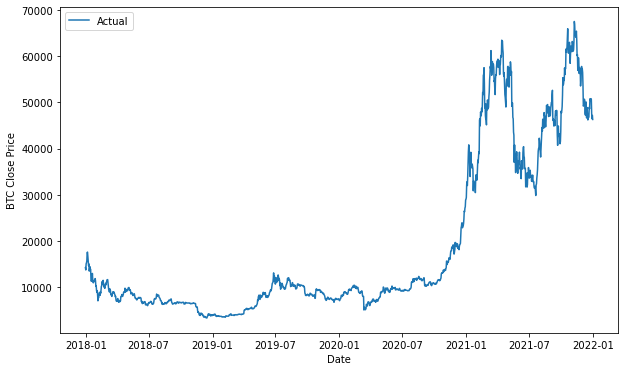

In [9]:
# plot initial data

plt.figure(figsize=(10,6))
plt.plot(df.index, df, label='Actual')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.legend()

In [10]:
# check stationary

print("Is the data stationary ?")
dftest = adfuller(df.values, autolag='AIC')

print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")

for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

Is the data stationary ?
Test statistic = -0.638
P-value = 0.862
Critical values :
	1%: -3.434908816804013 - The data is not stationary with 99% confidence
	5%: -2.863553406963303 - The data is not stationary with 95% confidence
	10%: -2.5678419239852994 - The data is not stationary with 90% confidence


In [11]:
# split train test 80:20

train, test = train_test_split(df, test_size=0.2, shuffle=False)

In [12]:
# show train shape

train.shape

(1169, 1)

In [13]:
# show test shape

test.shape

(293, 1)

## BASE MODELING

### 1. ARIMA

In [14]:
# set model

model_arima = pm.auto_arima(train, seasonal = False) # seasonal = False is ARIMA, True is SARIMA

In [15]:
# show model summary

model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1169
Model:               SARIMAX(0, 2, 3)   Log Likelihood               -9201.063
Date:                Fri, 29 Jul 2022   AIC                          18410.127
Time:                        00:50:21   BIC                          18430.375
Sample:                             0   HQIC                         18417.765
                               - 1169                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9904      0.013    -75.922      0.000      -1.016      -0.965
ma.L2          0.0868      0.017      5.044      0.000       0.053       0.121
ma.L3         -0.0821      0.012     -6.901      0.000      -0.105      -0.059
sigma2      4.022e+05   4278.259     94.012      0.000    3.94e+05    4.11e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             38013.90
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               6.08   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
# get model prediction

pred_arima = model_arima.predict(n_periods=293, seasonal = False) # n_periods must be the same len as train, set seasonal to True for SARIMA

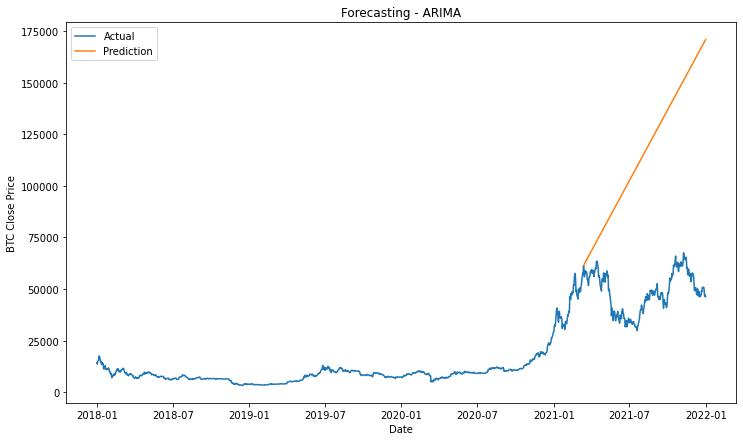

In [17]:
# plot model prediction vs actual

plt.figure(figsize=(12,7))
plt.plot(df.index, df["close"], label='Actual')
plt.plot(test.index, pred_arima, label='Prediction')
plt.title('Forecasting - ARIMA')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.legend()

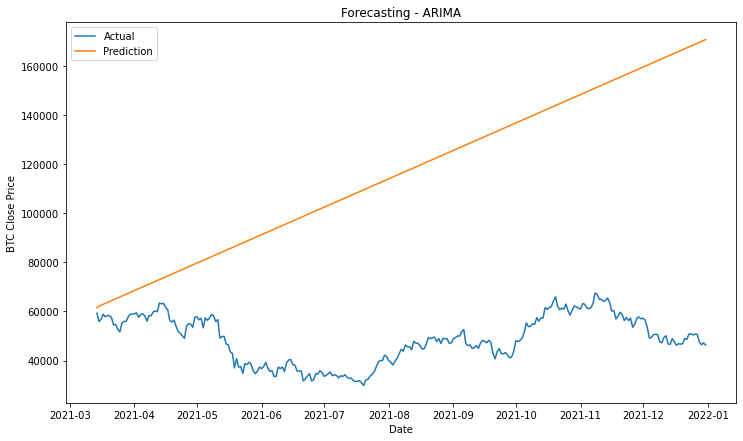

In [18]:
# plot model prediction vs actual

plt.figure(figsize=(12,7))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, pred_arima, label='Prediction')
plt.title('Forecasting - ARIMA')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.legend()

In [19]:
# get rmse

arima_RMSE = sqrt(mean_squared_error(test, pred_arima))
print(f"Model Arima RMSE = {arima_RMSE}")

Model Arima RMSE = 74697.51215716246


### 2. SIMPLE EXPONENTIAL SMOOTHING

In [20]:
# set model

model = SimpleExpSmoothing(train)
model_ses = model.fit(optimized=True) #set optimized to true for automodel and add 'add' or 'mul' to trend and or seasonal according to data

In [21]:
# show model summary

model_ses.summary()

Dep. Variable:,close,No. Observations:,1169
Model:,SimpleExpSmoothing,SSE,485142237.828
Optimized:,True,AIC,15126.241
Trend:,None,BIC,15136.369
Seasonal:,None,AICC,15126.275
Seasonal Periods:,None,Date:,"Fri, 29 Jul 2022"
Box-Cox:,False,Time:,00:50:21
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,14156.400,l.0,True


In [22]:
# get model prediction

pred_ses = model_ses.predict(start=1, end=293) # must be (1, the same len as train)

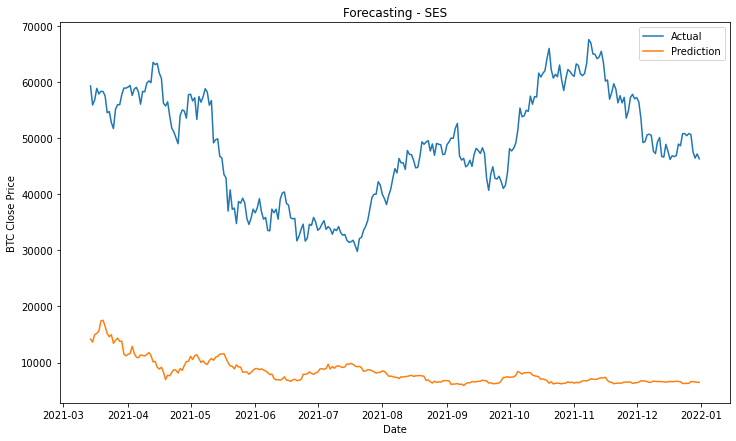

In [23]:
# plot model prediction vs actual

plt.figure(figsize=(12,7))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, pred_ses, label='Prediction')
plt.title('Forecasting - SES')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.legend()

In [24]:
# get rmse

ses_RMSE = sqrt(mean_squared_error(test, pred_ses))
print(f"Model SIMPLE EXPONENTIAL SMOOTHING RMSE = {ses_RMSE}")

Model SIMPLE EXPONENTIAL SMOOTHING RMSE = 41538.600050413756


### 3. TRIPLE EXPONENTIAL SMOOTHING

In [25]:
# set model

model1 = ExponentialSmoothing(train)
model_tes = model1.fit(optimized=True) #set optimized to true for automodel and choose 'add' or 'mul' to trend and or seasonal according to data

In [26]:
# show model summary

model_tes.summary()

Dep. Variable:,close,No. Observations:,1169
Model:,ExponentialSmoothing,SSE,485142237.828
Optimized:,True,AIC,15126.241
Trend:,None,BIC,15136.369
Seasonal:,None,AICC,15126.275
Seasonal Periods:,None,Date:,"Fri, 29 Jul 2022"
Box-Cox:,False,Time:,00:50:22
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,14156.400,l.0,True


In [27]:
# get model prediction

pred_tes = model_tes.predict(start=1, end=293) # must be (1, the same len as train)

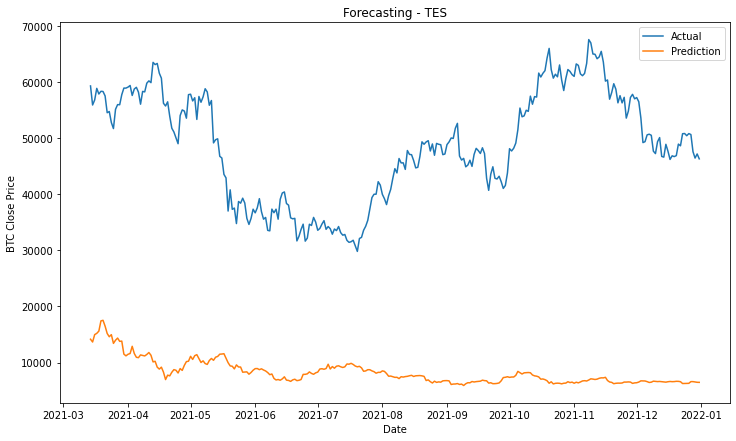

In [28]:
# plot model prediction vs actual

plt.figure(figsize=(12,7))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, pred_tes, label='Prediction')
plt.title('Forecasting - TES')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.legend()

In [29]:
# get rmse

tes_RMSE = sqrt(mean_squared_error(test, pred_tes))
print(f"Model TRIPLE EXPONENTIAL SMOOTHING RMSE = {tes_RMSE}")

Model TRIPLE EXPONENTIAL SMOOTHING RMSE = 41538.600050413756


## ROLLING FORECASTING

### 1. ROLLING ARIMA

In [30]:
model_arima = pm.auto_arima(train, seasonal = False)

In [31]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1169
Model:               SARIMAX(0, 2, 3)   Log Likelihood               -9201.063
Date:                Fri, 29 Jul 2022   AIC                          18410.127
Time:                        00:50:39   BIC                          18430.375
Sample:                             0   HQIC                         18417.765
                               - 1169                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9904      0.013    -75.922      0.000      -1.016      -0.965
ma.L2          0.0868      0.017      5.044      0.000       0.053       0.121
ma.L3         -0.0821      0.012     -6.901      0.000      -0.105      -0.059
sigma2      4.022e+05   4278.259     94.012      0.000    3.94e+05    4.11e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             38013.90
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               6.08   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
# set model rolling ARIMA

pred_roll = []
act_roll = []

for i in test.values:
    output = model_arima.predict(n_periods=1)
    pred = list(output)[0]
    act = list(i)[0]
    pred_roll.append(pred)
    act_roll.append(act)
    model_arima.update(list(i)[0])

In [33]:
pd.DataFrame({"pred":pred_roll,"act":act_roll})

,pred,act
0,61529,59302
1,59994,55907
2,56088,56805
3,56899,58871
4,59217,57859
...,...,...
288,50841,50640
289,50692,47589
290,47734,46445
291,46497,47178


In [34]:
# show updated model summary

model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1462
Model:               SARIMAX(0, 2, 3)   Log Likelihood              -12419.650
Date:                Fri, 29 Jul 2022   AIC                          24847.300
Time:                        00:51:36   BIC                          24868.445
Sample:                             0   HQIC                         24855.188
                               - 1462                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0277      0.008   -126.316      0.000      -1.044      -1.012
ma.L2          0.0341      0.011      3.149      0.002       0.013       0.055
ma.L3         -0.0043      0.007     -0.595      0.552      -0.019       0.010
sigma2      4.948e+05   3596.238    137.597      0.000    4.88e+05    5.02e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              6964.51
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              20.35   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

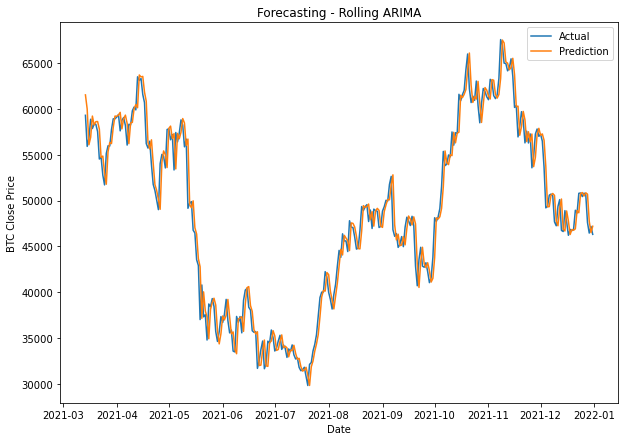

In [35]:
# plot model prediction vs actual

plt.figure(figsize=(10,7))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, pred_roll, label='Prediction')
plt.title('Forecasting - Rolling ARIMA')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.legend()

In [36]:
# get rmse

roll_RMSE = sqrt(mean_squared_error(test, pred_roll))
print(f"Model Rolling Arima RMSE = {round(roll_RMSE, 2)}")

Model Rolling Arima RMSE = 1859.75


### 2. ROLLING SES

In [37]:
# set model

model = SimpleExpSmoothing(train)
model_ses1 = model.fit(optimized=True)

In [38]:
# show model summary

model_ses1.summary()

Dep. Variable:,close,No. Observations:,1169
Model:,SimpleExpSmoothing,SSE,485142237.828
Optimized:,True,AIC,15126.241
Trend:,None,BIC,15136.369
Seasonal:,None,AICC,15126.275
Seasonal Periods:,None,Date:,"Fri, 29 Jul 2022"
Box-Cox:,False,Time:,00:51:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,14156.400,l.0,True


In [39]:
# set model

pred_ses = []
history = list(train.values)

for i in test.values:
    model = SimpleExpSmoothing(history)
    model_ses2 = model.fit(optimized=True)
    output = model_ses2.forecast()
    pred = list(output)[0]
    pred_ses.append(pred)
    history.append(i)

In [40]:
# show model summary

model_ses2.summary()

Dep. Variable:,endog,No. Observations:,1461
Model:,SimpleExpSmoothing,SSE,1475245938.159
Optimized:,True,AIC,20202.638
Trend:,None,BIC,20213.212
Seasonal:,None,AICC,20202.665
Seasonal Periods:,None,Date:,"Fri, 29 Jul 2022"
Box-Cox:,False,Time:,00:51:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9602931,alpha,True
initial_level,14139.712,l.0,True


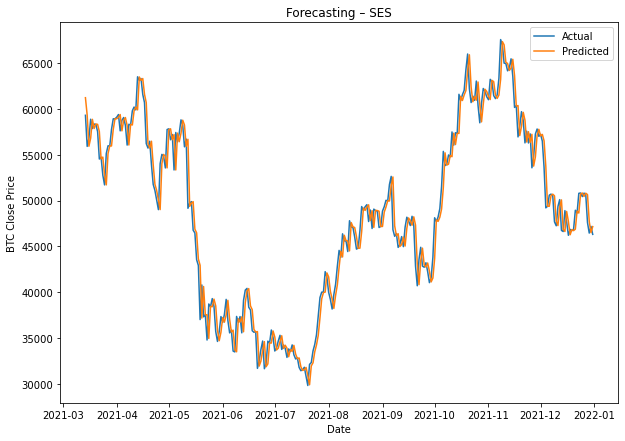

In [41]:
# plot model prediction vs actual

plt.figure(figsize=(10,7));
plt.plot(test.index, test, label='Actual');
plt.plot(test.index, pred_ses, label='Predicted');
plt.title('Forecasting – SES')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.legend()

In [42]:
# get rmse

ses_RMSE = sqrt(mean_squared_error(test, pred_ses))
print(f'Model SES RMSE = {round(ses_RMSE, 2)}')

Model SES RMSE = 1841.11


### 3. ROLLING TES

In [43]:
# set model

model = ExponentialSmoothing(train)
model_tes1 = model.fit(optimized=True)

In [44]:
# show model summary

model_tes1.summary()

Dep. Variable:,close,No. Observations:,1169
Model:,ExponentialSmoothing,SSE,485142237.828
Optimized:,True,AIC,15126.241
Trend:,None,BIC,15136.369
Seasonal:,None,AICC,15126.275
Seasonal Periods:,None,Date:,"Fri, 29 Jul 2022"
Box-Cox:,False,Time:,00:51:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,14156.400,l.0,True


In [45]:
# set model

history = train
pred_tes = pd.Series()

for t in range(len(test)):
    model = ExponentialSmoothing(history)
    model_tes2 = model.fit(optimized=True)
    output = model_tes2.forecast()
    pred_tes = pred_tes.append(output)
    item = test.iloc[[t]]
    history = history.append(item)
#     print('predicted=%f, expected=%f' % (output.values[0], item["close"].values[0]))

In [46]:
# show updated model summary

model_tes2.summary()

Dep. Variable:,close,No. Observations:,1461
Model:,ExponentialSmoothing,SSE,1475245938.159
Optimized:,True,AIC,20202.638
Trend:,None,BIC,20213.212
Seasonal:,None,AICC,20202.665
Seasonal Periods:,None,Date:,"Fri, 29 Jul 2022"
Box-Cox:,False,Time:,00:51:45
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9602931,alpha,True
initial_level,14139.712,l.0,True


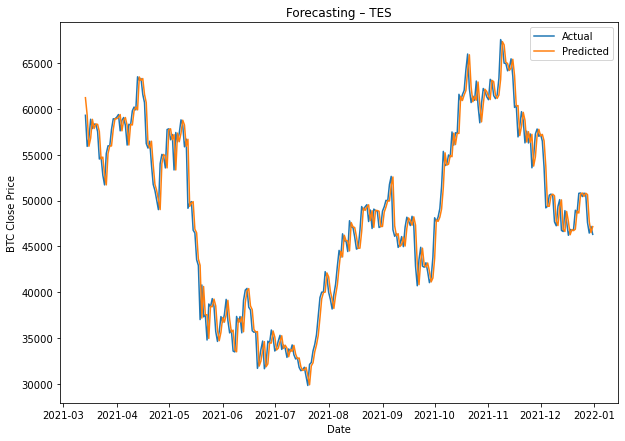

In [47]:
# plot model prediction vs actual

plt.figure(figsize=(10,7));
plt.plot(test.index, test, label='Actual');
plt.plot(test.index, pred_tes, label='Predicted');
plt.title('Forecasting – TES')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.legend();

In [48]:
# get rmse

tes_RMSE = sqrt(mean_squared_error(test, pred_tes))
print(f"Model TES RMSE = {round(tes_RMSE, 2)}")

Model TES RMSE = 1841.11


## RMSE RESULT

In [49]:
# print rmse result

print(f""" 
 ALL ROLLING MODEL RMSE RESULT 
 =====================
 || ARIMA  : {round(roll_RMSE,2)} 
 || SES   : {round(ses_RMSE,2)}
 || TES    : {round(tes_RMSE,2)}
    """)

 
 ALL ROLLING MODEL RMSE RESULT 
 || ARIMA  : 1859.75 
 || SES   : 1841.11
 || TES    : 1841.11
    


> Best model is either **SES or ES using rolling method**, proven by **the lower RMSE.**

### PLOT FORECASTED VALUES

In [50]:
# function to plot future values

def plot_forecast(data, pred, n_periods, freq):
    
    # compile index and values
    index_of_fc = pd.date_range(data.index[-1], periods=n_periods, freq=freq)
    fitted_series = pd.Series(pred, index=index_of_fc)
    
    # plot forecasted
    plt.figure(figsize=(8,5))
    plt.plot(data, label = "Hist")
    plt.plot(fitted_series, label = "Forecast")
    plt.legend()
    plt.show()

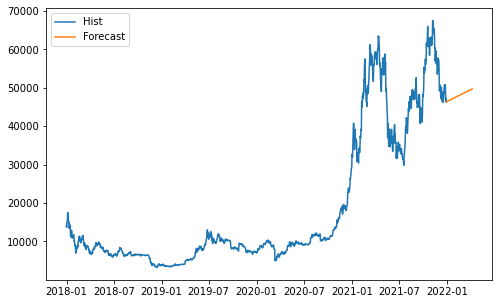

In [51]:
# plot arima
n_period = 100
pred_arima = model_arima.predict(n_period)
plot_forecast(df, pred_arima, n_period, 'D')

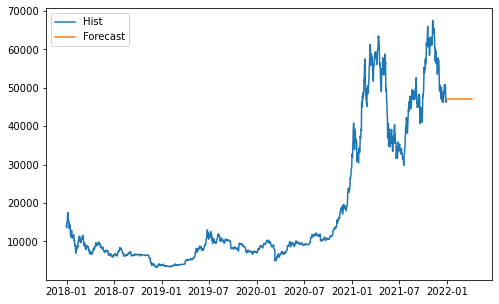

In [52]:
# plot tes
n_period = 100
pred_tes = model_tes2.forecast(n_period)
plot_forecast(df, pred_tes, n_period, 'D')

### TRANSFORMING

In [53]:
# use differencing

df_diff = df.diff().dropna()

<AxesSubplot:xlabel='date'>

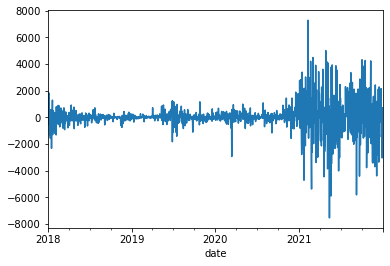

In [54]:
df_diff.close.plot()

In [55]:
# train test split using diff

train_diff, test_diff = train_test_split(df_diff, test_size=0.2, shuffle=False)

In [56]:
# set model with diff

model_diff = ExponentialSmoothing(train_diff)
model_diff = model_diff.fit(optimized=True)

In [57]:
# get model prediction

pred_diff = model_diff.predict(start=1, end=293) # must be (1, the same len as train)

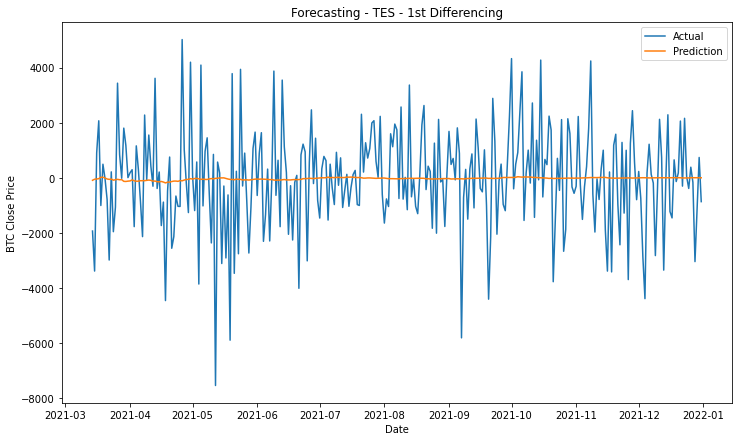

In [58]:
# plot model prediction vs actual

plt.figure(figsize=(12,7))
plt.plot(test_diff.index, test_diff, label='Actual')
plt.plot(test_diff.index, pred_diff, label='Prediction')
plt.title('Forecasting - TES - 1st Differencing')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.legend()

In [59]:
# set model

pred_ses_diff = []
history_diff = list(train_diff.values)

for i in test.values:
    model = SimpleExpSmoothing(history)
    model_ses_diff = model.fit(optimized=True)
    output = model_ses_diff.forecast()
    pred = list(output)[0]
    pred_ses_diff.append(pred)
    history_diff.append(i)

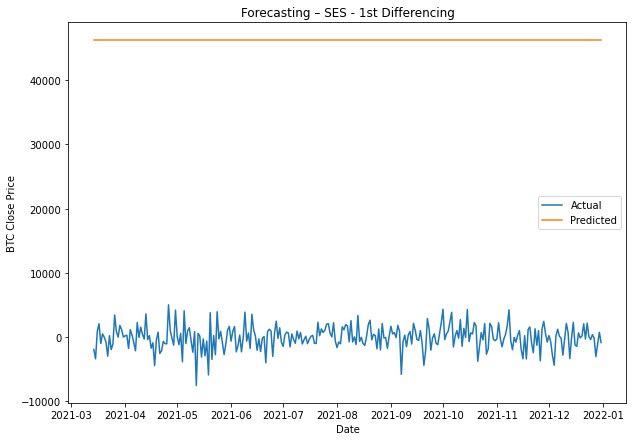

In [60]:
# plot model prediction vs actual

plt.figure(figsize=(10,7));
plt.plot(test_diff.index, test_diff, label='Actual');
plt.plot(test_diff.index, pred_ses_diff, label='Predicted');
plt.title('Forecasting – SES - 1st Differencing')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.legend()

### REFERENCES :

- Jason Brownlee, "How to Grid Search Triple Exponential Smoothing", https://machinelearningmastery.com/how-to-grid-search-triple-exponential-smoothing-for-time-series-forecasting-in-python/
- Jason Brownlee, "How to Create an ARIMA Model for Time Series", https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
- Jason Brownlee, "How to Grid Search ARIMA Model Hyperparameters", https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/
- "What are the values p, d, q, in ARIMA?", https://stats.stackexchange.com/questions/44992/what-are-the-values-p-d-q-in-arima
- Michael Grogan, "Automatic vs. Manual ARIMA Configurationk", https://towardsdatascience.com/automatic-vs-manual-arima-configuration-ceb06fe074da
- Sharmistha Chatterjee, "Basic Understanding of ARIMA/SARIMA vs Auto ARIMA/SARIMA", https://hackernoon.com/basic-understanding-of-arimasarima-vs-auto-arimasarima-using-covid-19-data-predicions-8o1v3x4t
- Benjamin Etienne, "Time Series in Python — Exponential Smoothing and ARIMA processes", https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788
- Brendan Artley, "Time Series Forecasting with ARIMA , SARIMA and SARIMAX", https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6
- Autoarima, https://pypi.org/project/pmdarima/
- Exp Smoothing, https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html
- Simple Exp Smoothing, https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html
- Holtwinters Res, https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.HoltWintersResults.html